In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset comprises data on ~1100 accessions (plants with different genetics) that grew on 4 different conditions. 
I'm focusing in the metabolite data of each accession.
Each accession can have up to 17 different metabolites, in different amounts. 
Each accession has a dominant metabolite, called chemotype, that is based on the activity of different enzymes in the plants.

The question: 
Can we find clusters of accessions with the same metablite profiles?
Is this profile align with the chemotype?
Is there a connection to the condition they grew on?
Can the metabolite data predict the chemotype?

In [5]:
#Data loading:
Phenotypes = pd.read_csv("Datasets\All_Data_Chemotypes.csv")

In [3]:
Phenotypes.dtypes

Unnamed: 0                      int64
CS_number                      object
N_treatment                    object
tg_ecotypeid                    int64
name                           object
country                        object
latitude                      float64
longitude                     float64
collector                      object
seq_by                         object
Experiment                     object
N_source                       object
N_concentration               float64
Leaf_Area                     float64
Total_roots                   float64
PR_length                     float64
Number_of_LR                  float64
Total_LR                      float64
LR_density                    float64
LR_length                     float64
LR_to_total_roots             float64
LR_to_PR                      float64
X3OHP                         float64
X4OHB                         float64
X3MSO                         float64
OH_3_Butenyl                  float64
X4MSO       

In [6]:
#Not all the accessions have a chemotype. Those who haven't will be classified as Unknown:
Phenotypes['Chemotype'].fillna("Unknown", inplace=True)

The first thing is to understand if the accessions cluster to different groups based on the metabolite data.
I started with PCA based on the metabolite data:

In [7]:
from sklearn.preprocessing import StandardScaler
GSL = ['X3OHP', 'X4OHB', 'X3MSO', 'OH_3_Butenyl', 'X4MSO', 'Allyl', 'X5MSO', 'Branches', 'X3_Butenyl', 'X6MSO', 'X3MT', 'X7MSO', 
       'X4_Pentenyl', 'X4MT', 'X8MSO', 'I3M', 'X4MOI3M']
# Separating out the features
x = Phenotypes.loc[:, GSL].values
# Separating out the target
y = Phenotypes.loc[:,['Chemotype']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, Phenotypes['Chemotype']], axis = 1)

In [10]:
Phenotypes['Chemotype'].unique()

array(['Allyl', '3OHP', 'OH-But', 'Butenyl', '4MSO', '4MT', '3MT', '3MSO',
       '4OHB', 'Unknown'], dtype=object)

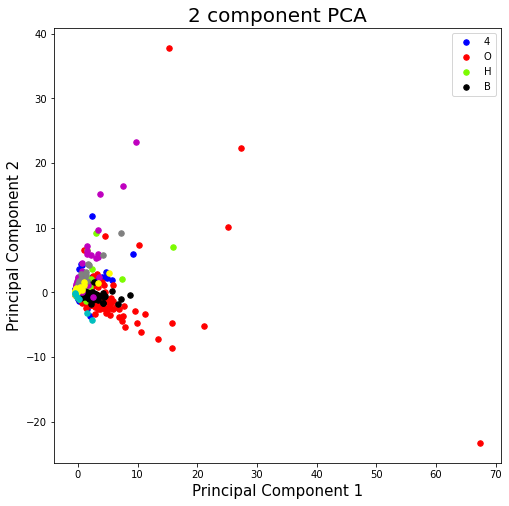

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Chemotype = ['Allyl', 'OH-But', '3OHP', 'Butenyl', '4MSO', '4MT', '3MT', '3MSO','4OHB']
colors = ['b','r', 'lawngreen', 'k', 'm', 'grey', 'grey', 'yellow','c']
for Chemotype, color in zip(Chemotype,colors):
    indicesToKeep = finalDf['Chemotype'] == Chemotype
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(Chemotype)

The PCA analysis doest reveal any structure in the data.
I'll conduct a tSNE analysis with the same data.

In [11]:
#pip install keras
#import sys

In [12]:
#tSNE analysis:
from sklearn.manifold import TSNE
#from keras.datasets import mnist
from numpy import reshape
import seaborn as sns

In [13]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3888 samples in 0.000s...
[t-SNE] Computed neighbors for 3888 samples in 0.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3888
[t-SNE] Computed conditional probabilities for sample 2000 / 3888
[t-SNE] Computed conditional probabilities for sample 3000 / 3888
[t-SNE] Computed conditional probabilities for sample 3888 / 3888
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.773056
[t-SNE] KL divergence after 1000 iterations: 0.980661


In [14]:
df = pd.DataFrame()
df["comp-1"] = z[:,0].tolist()
df["comp-2"] = z[:,1].tolist()
df["N_treatment"] = Phenotypes['N_treatment'].tolist()
df["y"] = Phenotypes['Chemotype'].tolist()
df["PR_length"] = Phenotypes['PR_length']
df["Total_roots"] = Phenotypes['Total_roots']

[Text(0.5, 1.0, 'GSL data T-SNE')]

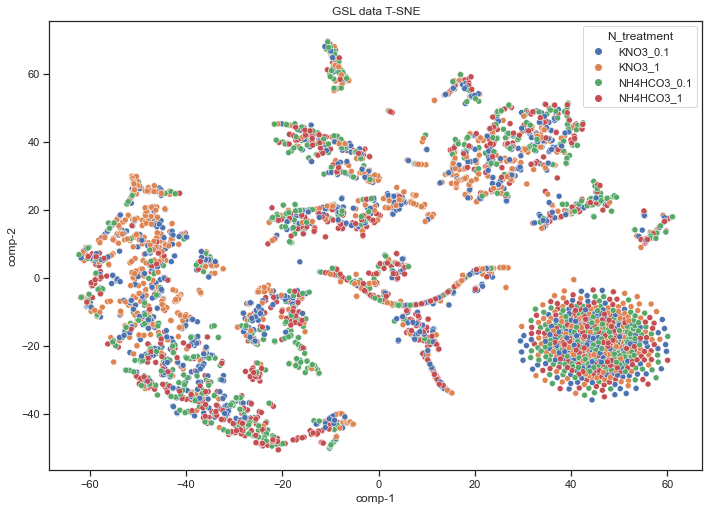

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
sns.scatterplot(x="comp-1", y="comp-2", hue="N_treatment", 
                data=df).set(title="GSL data T-SNE") 

The tSNE analysis gives us a great structure. 
When I color it based on the condition it grew on it doesn't seem to be any connection to the nitrogen condition the seedling is grown on.
Next I checked if there is any assosiation to the accessions' chemotype.

[Text(0.5, 1.0, 'GSL data T-SNE')]

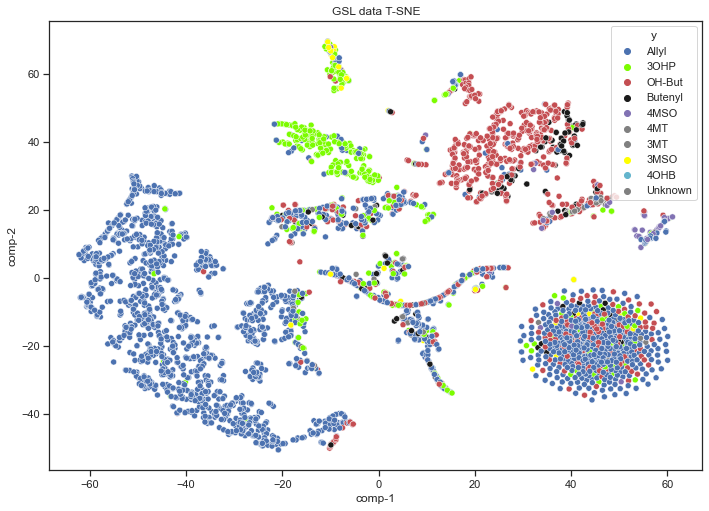

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
sns.scatterplot(x="comp-1", y="comp-2", hue="y", 
                data=df,
                palette=['b', 'lawngreen','r', 'k', 'm', 'grey', 'grey', 'yellow','c', 'grey']).set(title="GSL data T-SNE") 

The dataset comprises a few distinctive populations. 
Some of the populations align very well with the chemotypic classification.

What differentiate between the different Allyl (blue) groups?

[Text(0.5, 1.0, 'GSL data T-SNE')]

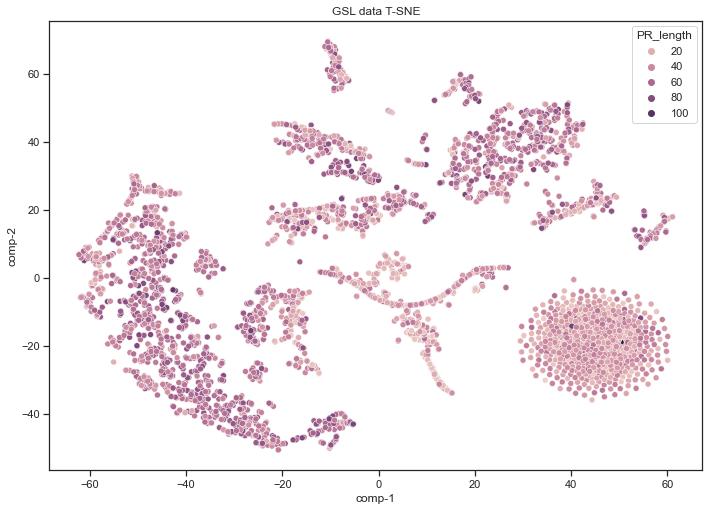

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
sns.scatterplot(x="comp-1", y="comp-2", hue="PR_length", 
                data=df).set(title="GSL data T-SNE") 

[Text(0.5, 1.0, 'GSL data T-SNE')]

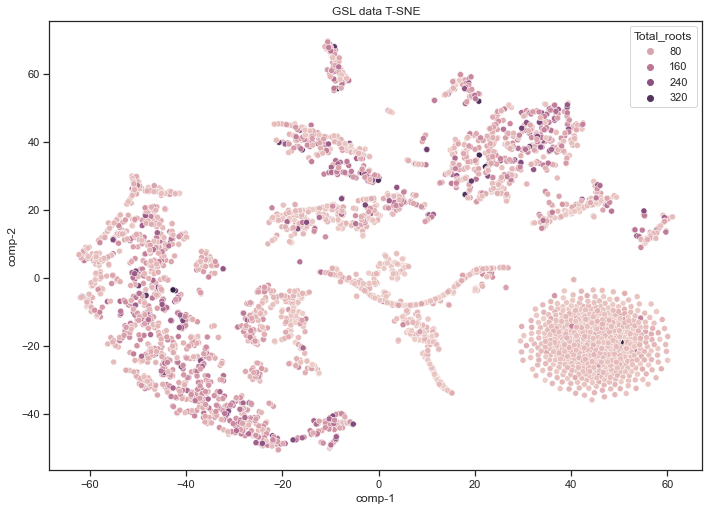

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
sns.scatterplot(x="comp-1", y="comp-2", hue="Total_roots", 
                data=df).set(title="GSL data T-SNE") 

It looks like the Allyl groups are differentiate based on the roots length. 
Allyl accessions with smaller roots align together, and Allyl accessions with longer roots align in a different group.

Can the metabolite data predict the chemotype?
To answer that I am doing a random forest classifier analysis.

In [19]:
x_1 = pd.DataFrame(x)
x_1.fillna(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.398586,-0.100207,-0.115713,-0.151278,-0.093232,-0.457482,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.161049,-0.049504,-0.099664,0.452609,-0.179042,0.117027
1,-0.079191,0.282503,-0.115713,-0.151278,-0.093232,-0.006108,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.035982,-0.049504,-0.099664,0.455299,-0.111879,-0.050919
2,0.846795,-0.100207,-0.115713,-0.151278,-0.093232,0.280649,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.161049,-0.049504,-0.099664,2.034673,0.407357,0.092875
3,0.300983,4.661025,-0.115713,-0.151278,-0.093232,5.260322,-0.038476,-0.10189,-0.030813,-0.034155,-0.091644,0.453523,-0.049504,-0.099664,2.034089,1.560654,0.360379
4,-0.107965,-0.100207,-0.115713,-0.151278,-0.093232,-0.345039,-0.038476,-0.10189,-0.189690,-0.034155,0.801314,-0.161049,-0.049504,-0.099664,-0.386843,-0.192371,0.140438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,-0.107965,-0.100207,-0.115713,-0.151278,-0.093232,1.706286,-0.038476,-0.10189,-0.189690,-0.034155,0.766060,-0.161049,-0.049504,-0.099664,0.064132,0.143018,-0.095131
3884,-0.107965,-0.100207,-0.115713,-0.151278,-0.093232,-0.457482,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.161049,-0.049504,-0.099664,-0.386843,-0.313003,-0.095131
3885,-0.107965,-0.100207,-0.115713,-0.151278,-0.093232,-0.336387,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.161049,-0.049504,-0.099664,-0.307239,-0.248610,-0.095131
3886,-0.107965,-0.100207,-0.115713,-0.151278,-0.093232,-0.457482,-0.038476,-0.10189,-0.189690,-0.034155,-0.091644,-0.161049,-0.049504,-0.099664,-0.079959,-0.121170,-0.095131


In [20]:
x_2 = x_1.set_axis(['X3OHP', 'X4OHB', 'X3MSO', 'OH_3_Butenyl', 'X4MSO', 'Allyl', 'X5MSO', 'Branches', 'X3_Butenyl', 'X6MSO', 'X3MT', 'X7MSO', 
       'X4_Pentenyl', 'X4MT', 'X8MSO', 'I3M', 'X4MOI3M'], axis=1, inplace=False)

In [48]:
from sklearn.preprocessing import LabelEncoder

Data = ['Allyl', '3OHP', 'OH-But', 'Butenyl', '4MSO', '4MT', '3MT', '3MSO', '4OHB', 'Unknown']
#values = np.array(Data)
values = np.array(y)
print("Data: ", values)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:" ,integer_encoded)

Data:  [['Allyl']
 ['Allyl']
 ['Allyl']
 ...
 ['Allyl']
 ['Allyl']
 ['Allyl']]
Label Encoder: [6 6 6 ... 6 6 6]


C:\Users\Ella Katz\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_2, integer_encoded, test_size=0.3, random_state=42, stratify=y)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2721, 17)
Training Labels Shape: (2721,)
Testing Features Shape: (1167, 17)
Testing Labels Shape: (1167,)


In [57]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [58]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857754927163667


The accurancy is not very high, but for biological processes I think it will be considered as ok...

Checking the importance of each of the metabolites in predicting the chemotype:

In [59]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Allyl           0.168073
OH_3_Butenyl    0.155279
I3M             0.146106
X3OHP           0.127014
X3_Butenyl      0.108629
X4MOI3M         0.091903
X8MSO           0.063006
X4MT            0.047407
X4MSO           0.022254
X7MSO           0.018980
X3MT            0.018598
X3MSO           0.017079
X4OHB           0.007743
Branches        0.002591
X4_Pentenyl     0.002375
X6MSO           0.001792
X5MSO           0.001170
dtype: float64

No handles with labels found to put in legend.


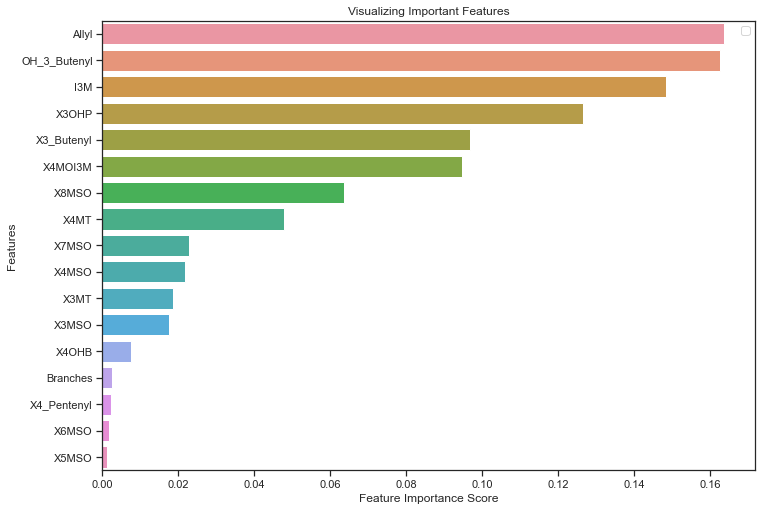

In [53]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


Plotting the confusion matrix:

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  3   0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0   5   0   1   0]
 [  1   0  88   2   0   0  44   1   1   0]
 [  0   0   1  13   1   0   4   1   3   0]
 [  0   0   0   1   7   0   2   0   1   0]
 [  0   0   1   0   0   0   1   0   0   0]
 [  5   3  16   2   2   1 643   1  21   0]
 [  0   0   2   0   0   0  17  21  12   0]
 [  1   0   5   4   2   0  66  10 141   0]
 [  0   0   0   0   0   0   1   0   0   0]]


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '3MSO'),
  Text(0, 1.5, '3MT'),
  Text(0, 2.5, '3OHP'),
  Text(0, 3.5, '4MSO'),
  Text(0, 4.5, '4MT'),
  Text(0, 5.5, '4OHB'),
  Text(0, 6.5, 'Allyl'),
  Text(0, 7.5, 'Butenyl'),
  Text(0, 8.5, 'OH-But'),
  Text(0, 9.5, 'Unknown')])

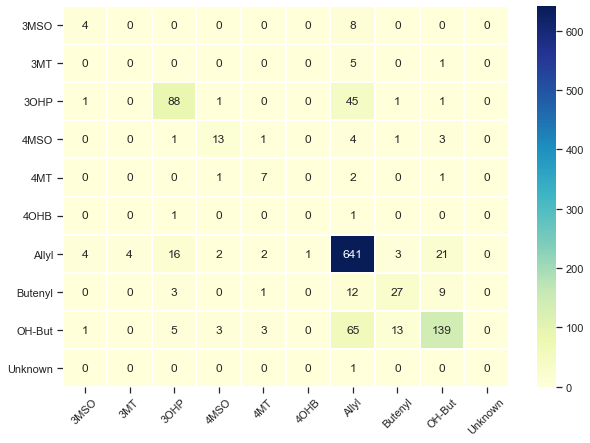

In [47]:
categories = ['Allyl' '3OHP' 'OH-But' 'Butenyl' '4MSO' '4MT' '3MT' '3MSO' '4OHB' 'Unknown']
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticklabels(['3MSO', '3MT', '3OHP', '4MSO', '4MT', '4OHB', 'Allyl', 'Butenyl', 'OH-But', 'Unknown']); 
plt.xticks(rotation=45)
ax.yaxis.set_ticklabels(['3MSO', '3MT', '3OHP', '4MSO', '4MT', '4OHB', 'Allyl', 'Butenyl', 'OH-But', 'Unknown']);
plt.yticks(rotation=0)

The next model that I'm testing is linear regression model:

In [61]:
from sklearn import linear_model, preprocessing

rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)
print(rModel.score(X_train, y_train))

0.11176052850495888


Text(0.5, 1.0, 'Predictions against actual result')

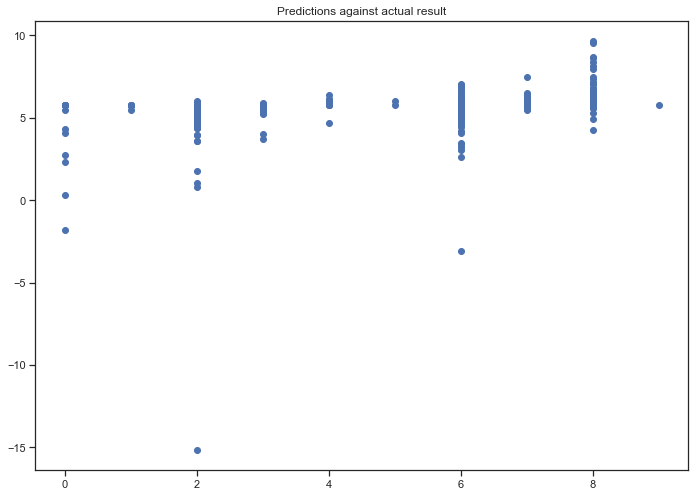

In [65]:
y_pred = rModel.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("Predictions against actual result")

This is a horible model. 
I'll try a different model: Ordinary Least Squares

In [70]:
import statsmodels.api as sm

rModel2 = sm.OLS(y_train, X_train)
rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              3.346
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                    4.00e-06
Time:                        09:20:16   Log-Likelihood:                         -8749.7
No. Observations:                2721   AIC:                                  1.753e+04
Df Residuals:                    2704   BIC:                                  1.763e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
X3OHP           -0.2254      0.113     -2.000      0.046      -0.446      -0.004
X4OHB            0.0038      0.115      0.033      0.974      -0.221       0.229
X3MSO           -0.2935      0.126     -2.328      0.020      -0.541      -0.046
OH_3_Butenyl     0.3373      0.162      2.079      0.038       0.019       0.656
X4MSO           -0.1936      0.145     -1.338      0.181      -0.477       0.090
Allyl            0.1773      0.128      1.387      0.166      -0.073       0.428
X5MSO            0.0367      0.111      0.331      0.741      -0.181       0.254
Branches         0.1304      0.102      1.275      0.202      -0.070       0.331
X3_Butenyl       0.1731      0.198      0.876      0.381      -0.214       0.560
X6MSO            0.0815      0.098      0.829      0.407      -0.111       0.274
X3MT            -1.5445      0.344     -4.486      0.000      -2.220      -0.869
X7MSO           -0.0643      0.188     -0.342      0.732      -0.433       0.305
X4_Pentenyl      0.0813      0.127      0.638      0.524      -0.169       0.331
X4MT             0.1406      0.128      1.095      0.274      -0.111       0.392
X8MSO            0.0689      0.135      0.511      0.610      -0.196       0.333
I3M             -0.1484      0.125     -1.191      0.234      -0.393       0.096
X4MOI3M         -0.0513      0.098     -0.522      0.601      -0.244       0.141
==============================================================================
Omnibus:                      398.238   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.841
Skew:                          -0.831   Prob(JB):                    2.49e-206
Kurtosis:                       5.364   Cond. No.                         5.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Predictions against actual result')

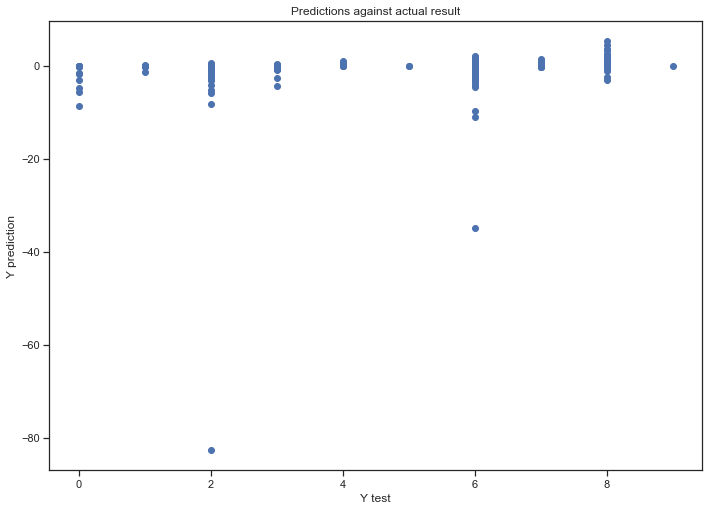

In [72]:
y_pred = rModel2_results.predict(X_test)
plt.scatter(y_test, y_pred)

plt.plot()
plt.xlabel('Y test')
plt.ylabel('Y prediction')
plt.title("Predictions against actual result")

That is a bad model as well.
So far the Random forest was the best model to predict the chemotype.

I started my analyses by trying to cluster the data. 
As opposed to PCA, tSNE was able to cluster the accessions based on the metabolite data pretty nicely.
There is a nice assosiation between the metabolite clustering and the chemotypes.
In a case where there were a few clusters of the same chemotye- the clusters were differentiated by the length of the roots.
I then tried to build a model to predict the chemotype based on the metabolite data. 
Two linear models were able to predict the chdemotype super weakly.
But a random forest clasification was able to use the metabolite data and somehow predict the chemotype. 
The metabolites that can serve as the best predictors are Allyl, OH-But, I3M, 3OHP and Butenyl.